<a href="https://colab.research.google.com/github/AzadehZahedi/Data-Analysis/blob/main/Supermarket_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supermarket Data Analysis

In [12]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

Read Data

In [13]:
# read data
supermarket_sales = pd.read_csv('supermarket_sales-Sheet1.csv')
supermarket_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Data Preparation

In [14]:
# rename some columns title to delete the blank space
supermarket_sales.rename(columns={'Invoice ID': 'Invoice_ID', 'Customer type': 'Customer_type',
                          'Product line': 'Product_line', 'Unit price': 'Unit_price',
                          'Tax 5%': 'Tax5%', 'gross margin percentage': 'gross_margin_percentage',
                          'gross income': 'gross_income'}, inplace=True)

In [15]:
# convert Date and Time columns to datetime type and extract the useful information of them
supermarket_sales['Time'] = pd.to_datetime(supermarket_sales['Time']).dt.hour
supermarket_sales['Date'] = pd.to_datetime(supermarket_sales['Date'], format='%m/%d/%Y')
supermarket_sales['Weekday'] = supermarket_sales['Date'].dt.day_name()
supermarket_sales['Month'] = supermarket_sales['Date'].dt.month_name()
supermarket_sales['Year'] = supermarket_sales['Date'].dt.year

<ipython-input-15-32d81b20274b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  supermarket_sales['Time'] = pd.to_datetime(supermarket_sales['Time']).dt.hour


In [16]:
supermarket_sales.head(3)

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,Weekday,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10,Cash,76.40,4.761905,3.8200,9.6,Friday,March,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,2019


In [40]:
Duration = max(supermarket_sales.Date) - min(supermarket_sales.Date)

Compare the performance of Branches

  Branch   Total_Sale
0      A  106200.3705
1      B  106197.6720
2      C  110568.7065


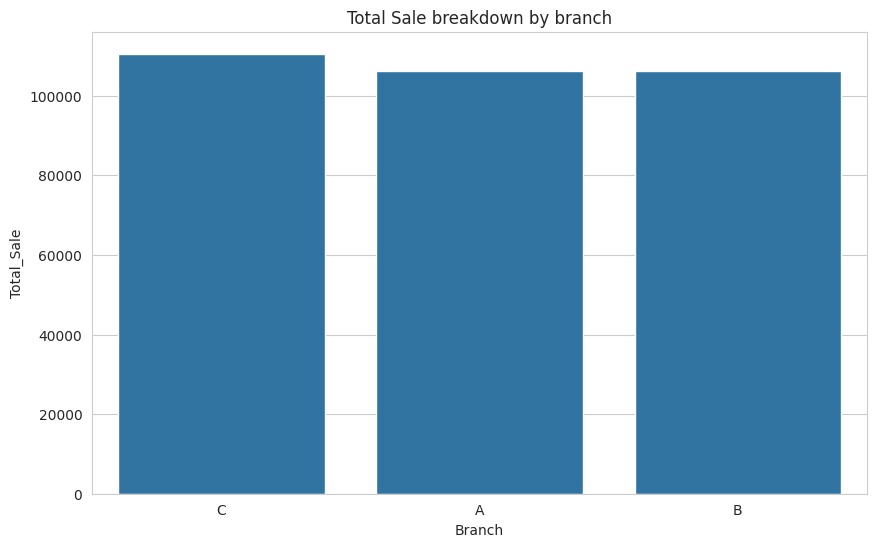

In [33]:
sales_by_branch = supermarket_sales.groupby('Branch').agg(Total_Sale=('Total', 'sum')).reset_index()
print(sales_by_branch)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=sales_by_branch, x='Branch', y='Total_Sale',
                 order=sales_by_branch.sort_values('Total_Sale', ascending=False).Branch)
ax.set(xlabel='Branch', ylabel='Total_Sale', title='Total Sale breakdown by branch')
plt.show()

Relationship between Attributes

      Month  Total_Sale
0  February   97219.374
1   January  116291.868
2     March  109455.507


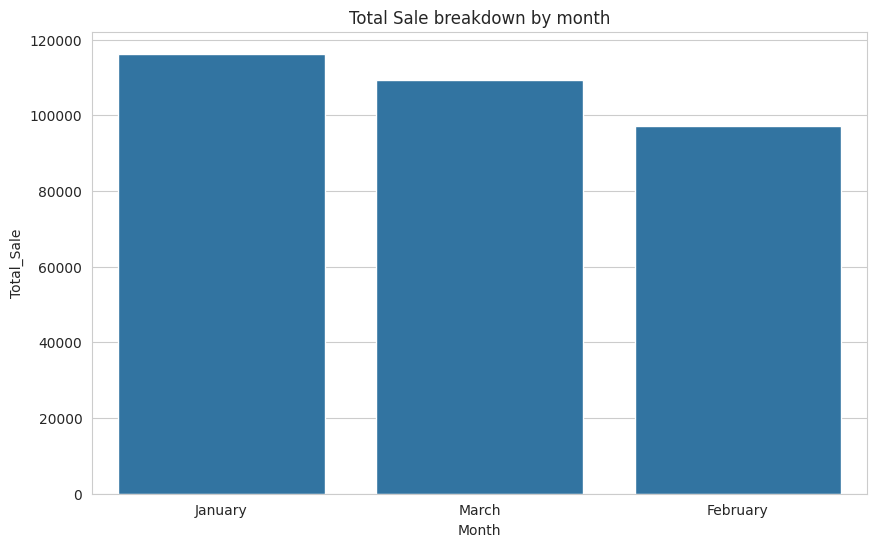

In [29]:
# relationship between month and amount of sales in all branches
sales_by_month = supermarket_sales.groupby('Month').agg(Total_Sale=('Total', 'sum')).reset_index()
print(sales_by_month)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=sales_by_month, x='Month', y='Total_Sale',
                 order=sales_by_month.sort_values('Total_Sale', ascending=False).Month)
ax.set(xlabel='Month', ylabel='Total_Sale', title='Total Sale breakdown by month')
plt.show()

      Month Branch  Total_Sale_Branch
0  February      A         29860.1205
1  February      B         34424.2710
2  February      C         32934.9825
3   January      A         38681.1285
4   January      B         37176.0585
5   January      C         40434.6810
6     March      A         37659.1215
7     March      B         34597.3425
8     March      C         37199.0430


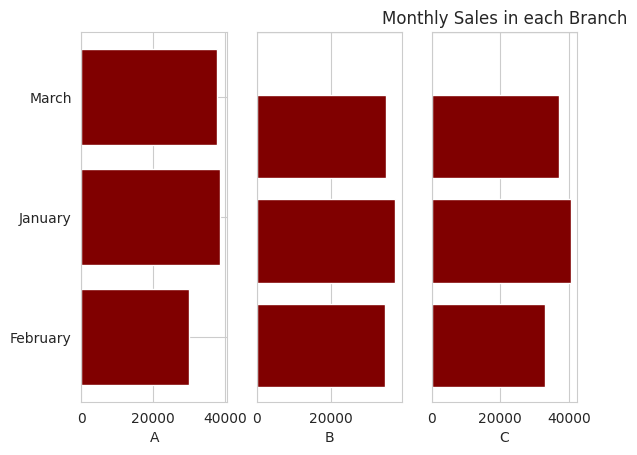

In [30]:
# relationship between month and amount of sales in each branch
sales_by_month_branch = supermarket_sales.groupby(['Month', 'Branch']).agg(Total_Sale_Branch=('Total', 'sum')).reset_index()
print(sales_by_month_branch)

fig, ax = plt.subplots(1,3)
ax[0].barh(sales_by_month_branch.Month[sales_by_month_branch.Branch == 'A'],
           sales_by_month_branch.Total_Sale_Branch[sales_by_month_branch.Branch == 'A'],
           color='maroon')
ax[1].barh(sales_by_month_branch.Month[sales_by_month_branch.Branch == 'B'],
           sales_by_month_branch.Total_Sale_Branch[sales_by_month_branch.Branch == 'B'],
           color='maroon')
ax[2].barh(sales_by_month_branch.Month[sales_by_month_branch.Branch == 'C'],
           sales_by_month_branch.Total_Sale_Branch[sales_by_month_branch.Branch == 'C'],
           color='maroon')

ax[0].set_xlabel('A')
ax[1].set_xlabel('B')
ax[2].set_xlabel('C')

ax[1].set_yticks(np.repeat('', 3))
ax[2].set_yticks(np.repeat('', 3))
plt.title('Monthly Sales in each Branch')
plt.show()

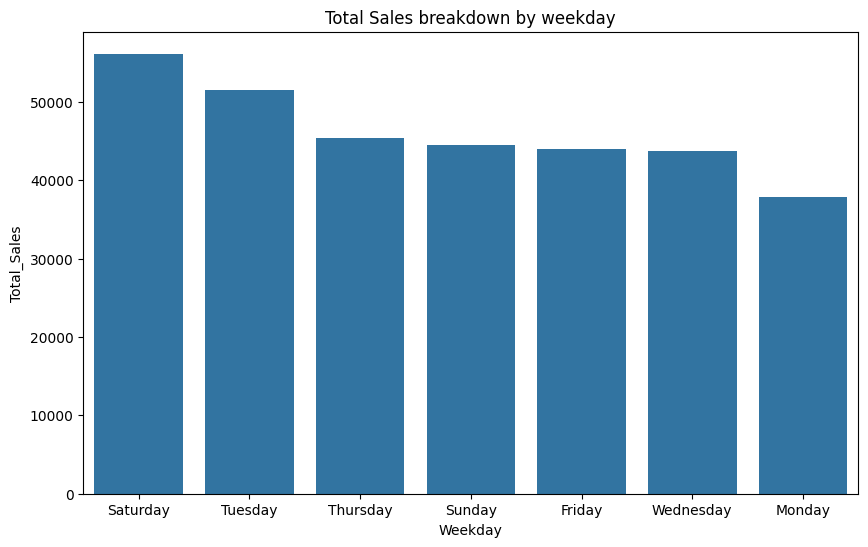

In [19]:
# relationship between the day and the amount of sales in all branches
sales_by_day = supermarket_sales.groupby('Weekday').agg(Total_Sales=('Total', 'sum')).reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=sales_by_day, x='Weekday', y='Total_Sales',
                 order=sales_by_day.sort_values('Total_Sales', ascending=False).Weekday)
ax.set(xlabel='Weekday', ylabel='Total_Sales', title='Total Sales breakdown by weekday')
plt.show()

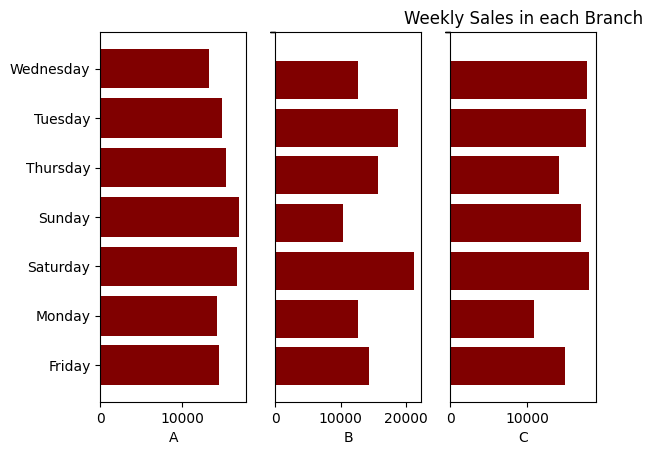

In [20]:
# relationship between day and amount of sales in each branch
sales_by_day_branch = supermarket_sales.groupby(['Weekday', 'Branch']).agg(Total_Sales_Branch=('Total', 'sum')).reset_index()

fig, ax = plt.subplots(1,3)
ax[0].barh(sales_by_day_branch.Weekday[sales_by_day_branch.Branch == 'A'],
           sales_by_day_branch.Total_Sales_Branch[sales_by_day_branch.Branch == 'A'],
           color='maroon')
ax[1].barh(sales_by_day_branch.Weekday[sales_by_day_branch.Branch == 'B'],
           sales_by_day_branch.Total_Sales_Branch[sales_by_day_branch.Branch == 'B'],
           color='maroon')
ax[2].barh(sales_by_day_branch.Weekday[sales_by_day_branch.Branch == 'C'],
           sales_by_day_branch.Total_Sales_Branch[sales_by_day_branch.Branch == 'C'],
           color='maroon')

ax[0].set_xlabel('A')
ax[1].set_xlabel('B')
ax[2].set_xlabel('C')

ax[1].set_yticks(np.repeat('', 7))
ax[2].set_yticks(np.repeat('', 7))
plt.title('Weekly Sales in each Branch')
plt.show()

<Axes: xlabel='Quantity', ylabel='gross_income'>

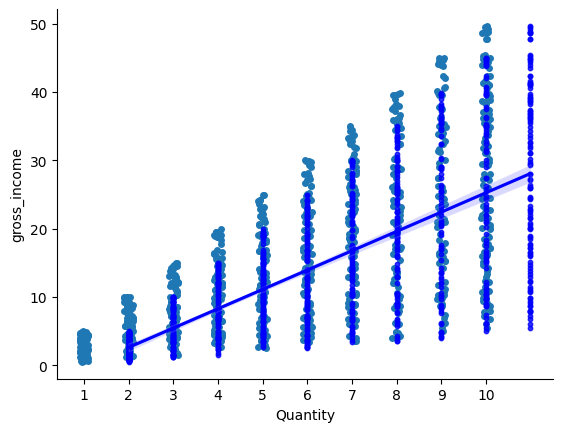

In [21]:
# relationship between quantity and income
sns.stripplot(x="Quantity", y="gross_income", data=supermarket_sales,zorder=0)
sns.set_style('whitegrid')
sns.despine()
sns.regplot(x='Quantity', y='gross_income', data=supermarket_sales, color='blue', scatter_kws={'s': 10})

Gender
Female    501
Male      499
Name: count, dtype: int64


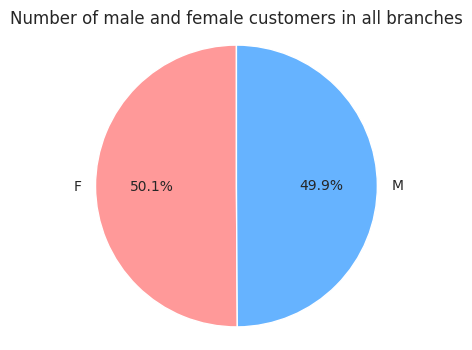

In [22]:
# number of male and female customers in all branches
gender_counts_total = supermarket_sales['Gender'].value_counts()
print(gender_counts_total)

plt.figure(figsize=(4,4))
plt.pie(gender_counts_total, colors=['#ff9999','#66b3ff'], labels=['F', 'M'], autopct='%1.1f%%', startangle=90)
plt.title('Number of male and female customers in all branches')
plt.axis('equal')
plt.show()

Gender  Female  Male
Branch              
A          161   179
B          162   170
C          178   150


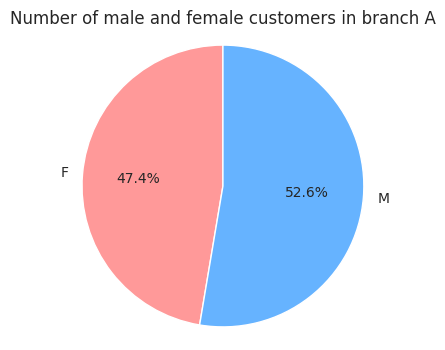

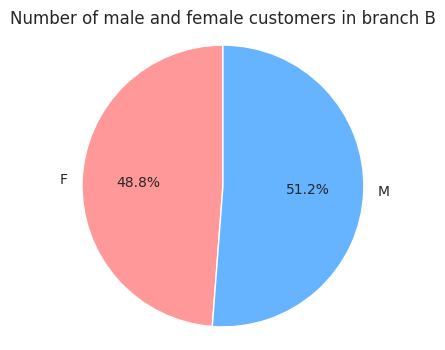

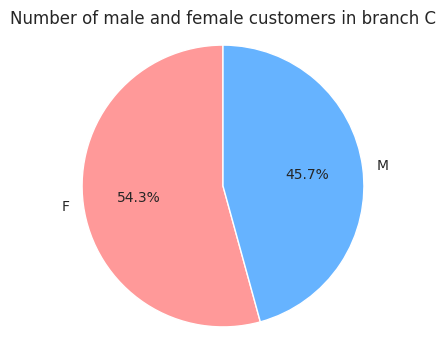

In [24]:
# number of male and female customers in each branche
branch_gender_counts = supermarket_sales.groupby('Branch')['Gender'].value_counts().unstack()
print(branch_gender_counts)

branches = branch_gender_counts.index
for branch in branches:
    plt.figure(figsize=(4,4))
    plt.pie(branch_gender_counts.loc[branch], labels=['F', 'M'], autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
    plt.title(f'Number of male and female customers in branch {branch}')
    plt.axis('equal')
    plt.show()

        Gender_Sale
Gender             
Female   167882.925
Male     155083.824


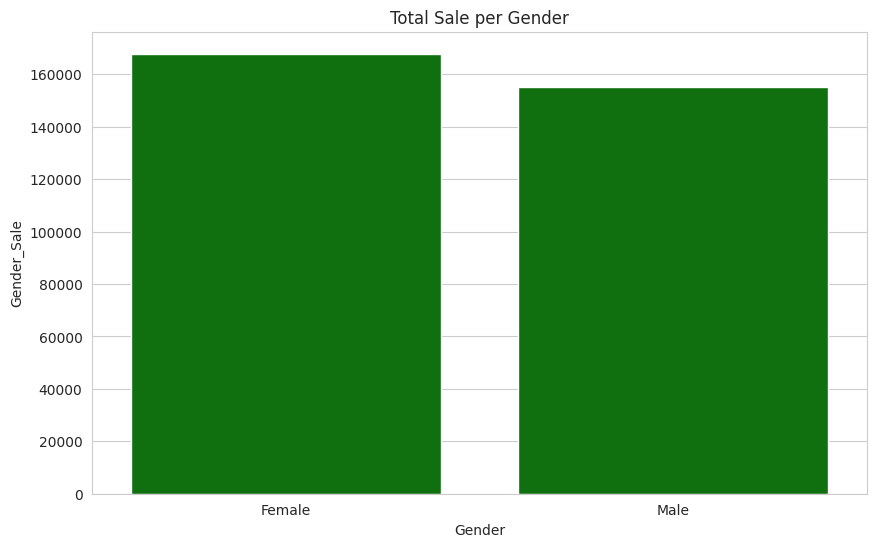

In [25]:
# sales amount according to gender
gender_sale_total = supermarket_sales.groupby('Gender').agg(Gender_Sale=('Total', 'sum'))
print(gender_sale_total)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=gender_sale_total, x='Gender', y='Gender_Sale', color='green')
ax.set(xlabel='Gender', ylabel='Gender_Sale', title='Total Sale per Gender')
plt.show()

               Customer_Sale  Customer_Quantity_Sale
Customer_type                                       
Member            164223.444                    2785
Normal            158743.305                    2725


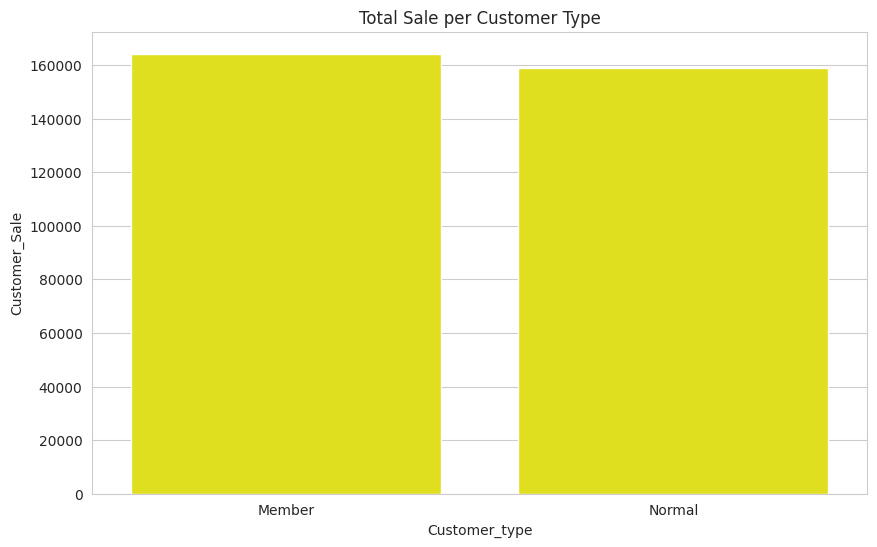

In [31]:
# sales amount according to Customer_type and Quantity
customertype_sale_total = supermarket_sales.groupby('Customer_type').agg(Customer_Sale=('Total', 'sum'), Customer_Quantity_Sale=('Quantity', 'sum'))
print(customertype_sale_total)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=customertype_sale_total, x='Customer_type', y='Customer_Sale', color='yellow')
ax.set(xlabel='Customer_type', ylabel='Customer_Sale', title='Total Sale per Customer Type')
plt.show()

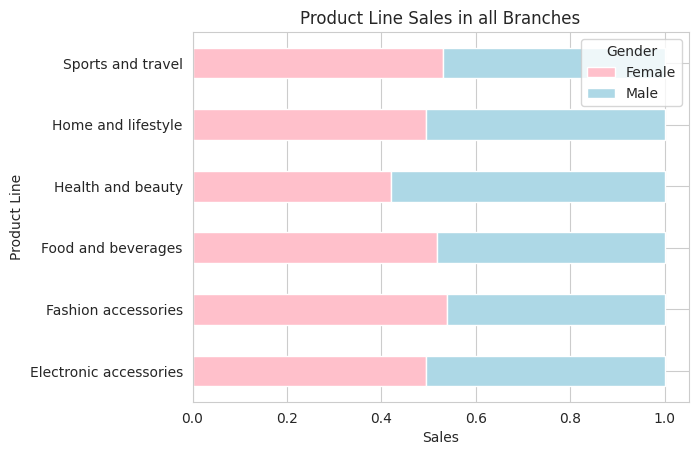

In [27]:
# sales amount of Product_line for women
sale_product_line = supermarket_sales.groupby('Product_line')['Gender'].value_counts(normalize=True).unstack()

sale_product_line.plot(kind='barh', stacked=True, color=['pink', 'lightblue'])
plt.xlabel('Sales')
plt.ylabel('Product Line')
plt.title('Product Line Sales in all Branches')
plt.show()

In [28]:
female_more_than_male = sale_product_line[sale_product_line['Female'] > sale_product_line['Male']]
print(female_more_than_male)

Gender                 Female      Male
Product_line                           
Fashion accessories  0.539326  0.460674
Food and beverages   0.517241  0.482759
Sports and travel    0.530120  0.469880


# FRM Model

In [50]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [51]:
# read new data
retail_data = pd.read_excel('online_retail_II.xlsx')

In [52]:
# 1- Recency
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'], format = '%m/%d/%Y %H:%M')

reference_date = retail_data['InvoiceDate'].max()

# Calculate Recency (days since the customer's last purchase)
recency_df = retail_data.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days
}).rename(columns={'InvoiceDate': 'Recency'})

In [53]:
# 2- Frequency
frequency_df = retail_data.groupby('Customer ID').agg({
    'InvoiceDate': 'count'
}).rename(columns={'InvoiceDate': 'Frequency'})

In [54]:
# 3- Monetary
retail_data['Total'] = retail_data['Price'] * retail_data['Quantity']
monetary_df = retail_data.groupby('Customer ID').agg({
    'Total': 'sum'
}).rename(columns={'Total': 'Monetary'})

In [55]:
# display in one table
rfm = recency_df.merge(frequency_df, on='Customer ID').merge(monetary_df, on='Customer ID')
print(rfm)

             Recency  Frequency  Monetary
Customer ID                              
12346.0           66         46    -64.68
12347.0            2         71   1323.32
12348.0           73         20    222.16
12349.0           42        107   2646.99
12351.0           10         21    300.93
...              ...        ...       ...
18283.0           17        230    641.77
18284.0           64         29    436.68
18285.0          295         12    427.00
18286.0          111         70   1188.43
18287.0           17         86   2340.61

[4383 rows x 3 columns]


In [66]:
# Segment customers based on their quartile scores
rfm['recency_segment'] = pd.qcut(x=rfm['Recency'], q=4,
                                     labels=[4, 3, 2, 1])

rfm['frequency_segment'] = pd.qcut(x=rfm['Frequency'], q=4,
                                     labels=[1,2,3,4])

rfm['monetary_segment'] = pd.qcut(x=rfm['Monetary'], q=4,
                                     labels=[1,2,3,4])

rfm['RFM_Score'] = rfm['recency_segment'].astype(int) + rfm['frequency_segment'].astype(int) + rfm['monetary_segment'].astype(int)

rfm['segment'] = np.where(rfm['RFM_Score'] >= 9, 'Best',
                          np.where(rfm['RFM_Score'] >= 6, 'Loyal',
                          np.where(rfm['RFM_Score'] >= 4, 'At Risk',
                          'Low Value')))

print(rfm.head())

             Recency  Frequency  Monetary recency_segment frequency_segment  \
Customer ID                                                                   
12346.0           66         46    -64.68               2                 3   
12347.0            2         71   1323.32               4                 3   
12348.0           73         20    222.16               2                 2   
12349.0           42        107   2646.99               3                 4   
12351.0           10         21    300.93               4                 2   

            monetary_segment  RFM_Score  segment  
Customer ID                                       
12346.0                    1          6    Loyal  
12347.0                    3         10     Best  
12348.0                    1          5  At Risk  
12349.0                    4         11     Best  
12351.0                    2          8    Loyal  
